In [0]:
import pandas as pd
import numpy as np
import seaborn as sns 

%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# loading data
recom_data = pd.read_csv('/content/drive/My Drive/Datasets/ratings_Electronics.csv', names=[ 'userId', 'productId', 'ratings', 'timestamp'])

In [0]:
# checking the shape of the data 
recom_data.shape

(7824482, 4)

In [0]:
# Checking random 10 sample rows
recom_data.sample(10)

,userId,productId,ratings,timestamp
956247,A19YDD8EKIKFND,B000FVY0ZK,3.0,1257292800
374358,A1ASZSSPUFNXGZ,B0001AP8CE,1.0,1281571200
3757577,A8LWIVE62YT44,B0040VGBYO,5.0,1371427200
2353859,AX7SFUDS0PVAW,B001UHOX32,3.0,1390953600
5490999,A3A39DCY6LWVEM,B006UJFESI,4.0,1361923200
1610721,A2OJ63L6NUX15S,B0012QN3AA,1.0,1330992000
4150146,A1VH8S9E0704KQ,B004HN81SE,3.0,1402963200
1517827,A17NF7NJB3QSOK,B000XP8DJC,5.0,1396569600
5438732,A3G82TXN49FMTF,B006NPYUDO,5.0,1361491200
3016352,ASUUMMZ9MN316,B0032CP24W,1.0,1389484800


In [0]:
# info
recom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId       object
productId    object
ratings      float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


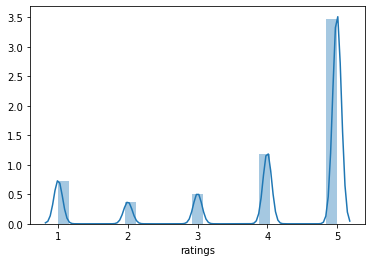

In [0]:
# univariate analysis for ratings
sns.distplot(recom_data['ratings'], bins=2)
# recom_data['ratings'].hist(bins=10)

In [0]:
# No. of unique userId, productId
recom_data.nunique()

userId       4201696
productId     476002
ratings            5
timestamp       5489
dtype: int64

In [0]:
# extract the data for the users who have given ratings to atleast 50 products
grouped_data = recom_data.groupby('userId').filter(lambda df: df['productId'].nunique() >= 50)
grouped_data

,userId,productId,ratings,timestamp
94,A3BY5KCNQZXV5U,0594451647,5.0,1390176000
118,AT09WGFUM934H,0594481813,3.0,1377907200
177,A32HSNCNPRUMTR,0970407998,1.0,1319673600
178,A17HMM1M7T9PJ1,0970407998,4.0,1281744000
492,A3CLWR1UUZT6TG,0972683275,5.0,1373587200
...,...,...,...,...
7824426,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0,1405641600
7824427,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0,1405209600
7824436,A3AYSYSLHU26U9,B00LI4ZZO8,4.0,1405296000
7824438,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0,1405209600


In [0]:
# checking the data for refined result
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125871 entries, 94 to 7824444
Data columns (total 4 columns):
userId       125871 non-null object
productId    125871 non-null object
ratings      125871 non-null float64
timestamp    125871 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.8+ MB


In [0]:
# dropping timestamp as it is not required currently.0
grouped_data_no_timestamp = grouped_data.drop('timestamp', axis=1, inplace=False)

In [0]:
# random 8 samples
grouped_data_no_timestamp.sample(8)

,userId,productId,ratings
3144435,A2MIP3AQVSF2SS,B0038KTAXW,3.0
5665858,A361U4SXK7FCQE,B0078GCLU6,4.0
5205769,A1P0JSFW184ZXJ,B005UUS6MO,5.0
2268019,AR18DH5SL9F73,B001RPEJA4,5.0
2531535,A1QQA7Y92L4F9R,B002C3KA2Q,5.0
2718344,AUK79PXTAOJP9,B002MT7JFQ,5.0
7703544,A2VALCFTOWFYXZ,B00GLM6F1O,1.0
1492583,AYGEKID3G7DPW,B000WMK8TE,4.0


In [0]:
# Checking the shape
grouped_data_no_timestamp.shape

(125871, 3)

In [0]:
# checking the unique entries
grouped_data_no_timestamp.nunique()

userId        1540
productId    48190
ratings          5
dtype: int64

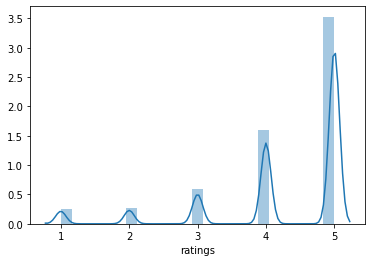

In [0]:
sns.distplot(grouped_data_no_timestamp['ratings'], bins=25)

In [0]:
# checking randomly per user records
grouped_data_no_timestamp[grouped_data_no_timestamp['userId'] == 'A3BY5KCNQZXV5U'].shape

(50, 4)

In [0]:
grouped_data_no_timestamp[grouped_data_no_timestamp['userId'] == 'A1WG97A0EFHYXN'].shape

(72, 3)

In [0]:
grouped_data_no_timestamp[grouped_data_no_timestamp['userId'] == 'A1WG97A0EFHYXN']['ratings'] > 3

103741      True
131807      True
272969      True
366057      True
498487      True
           ...  
7199269    False
7641053     True
7660211     True
7707519     True
7742375     True
Name: ratings, Length: 72, dtype: bool

In [0]:
# grouped_data_no_timestamp.to_csv('file1.csv')

In [0]:
popular_by_mean = grouped_data_no_timestamp.groupby('productId')['ratings'].mean()
popular_by_mean.head()

productId
0594451647    5.000000
0594481813    3.000000
0970407998    2.500000
0972683275    4.750000
1400501466    3.333333
Name: ratings, dtype: float64

In [0]:
popular_by_mean.sort_values(ascending=False).head()

productId
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
Name: ratings, dtype: float64

In [0]:
popular_by_count = grouped_data_no_timestamp.groupby('productId')['ratings'].count()
popular_by_count.head()

productId
0594451647    1
0594481813    1
0970407998    2
0972683275    4
1400501466    6
Name: ratings, dtype: int64

In [0]:
popular_by_count.sort_values(ascending=False).head()

productId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
Name: ratings, dtype: int64

In [0]:
ratings_mean_count = pd.DataFrame(popular_by_mean)
ratings_mean_count['rating_counts'] = pd.DataFrame(popular_by_count)  

In [0]:
ratings_mean_count.head()

,ratings,rating_counts
productId,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6


In [0]:
# Top 5 popular products 
ratings_mean_count['rating_counts'].sort_values(ascending=False).head()

productId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
Name: rating_counts, dtype: int64

In [0]:
# Top 5 recommendations based on popularity
ratings_mean_count.sort_values('rating_counts', ascending=False).head()

,ratings,rating_counts
productId,,
B0088CJT4U,4.218447,206
B003ES5ZUU,4.864130,184
B000N99BBC,4.772455,167
B007WTAJTO,4.701220,164
B00829TIEK,4.436242,149


In [0]:
ratings_mean_count["rank"] = ratings_mean_count["rating_counts"].rank(ascending=False) 

In [0]:
ratings_mean_count.sort_values('rank').head()

,ratings,rating_counts,rank
productId,,,
B0088CJT4U,4.218447,206,1.0
B003ES5ZUU,4.864130,184,2.0
B000N99BBC,4.772455,167,3.0
B007WTAJTO,4.701220,164,4.0
B00829TIEK,4.436242,149,5.0


In [0]:
def recommend_popular_product(df, popularity_col, popularity_based_on, number_of_recommendation, type_of_recommendation = True):
    '''
    This method provides the popularity/least popular products
    parameter description:
    df = Dataframe which you want to use.
    popularity_col
    popularity_based_on
    number_of_recommendation = total number of recommendation
    type_of_recommendation: if true, most popular products, else least popular 
    '''
    ratings_sorted = pd.DataFrame(df.groupby(popularity_col)[popularity_based_on].mean())
    ratings_sorted['score'] = pd.DataFrame(df.groupby(popularity_col)[popularity_based_on].count())
    ratings_sorted['rank'] = ratings_sorted['score'].rank(ascending=False)
    return ratings_sorted.sort_values('rank', ascending=type_of_recommendation).head(number_of_recommendation)

In [0]:
# Most popular 5 product
recommend_popular_product(grouped_data_no_timestamp, 'productId', 'ratings', 5)

,ratings,score,rank
productId,,,
B0088CJT4U,4.218447,206,1.0
B003ES5ZUU,4.864130,184,2.0
B000N99BBC,4.772455,167,3.0
B007WTAJTO,4.701220,164,4.0
B00829TIEK,4.436242,149,5.0


In [0]:
# Least popular 5 product
recommend_popular_product(grouped_data_no_timestamp, 'productId', 'ratings', 5, False)

,ratings,score,rank
productId,,,
0594451647,5.0,1,32773.0
B0049XR5MK,5.0,1,32773.0
B004A9DHMK,4.0,1,32773.0
B004AAPKTW,5.0,1,32773.0
B004AAZXQM,4.0,1,32773.0


In [0]:
!pip install surprise

In [0]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader

import collections

In [0]:
reader = Reader(rating_scale=(1, 5))

In [0]:
data = Dataset.load_from_df(grouped_data_no_timestamp,reader)

In [0]:
trainset, testset = train_test_split(data, test_size=.25)

In [0]:
# We'll use SVD algorithm.
algo = SVD()

In [0]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

In [0]:
predictions

[Prediction(uid='A33GNK4YENACDJ', iid='B00009R7QK', r_ui=5.0, est=4.412656238685416, details={'was_impossible': False}),
 Prediction(uid='A1E1LEVQ9VQNK', iid='B003DZ165W', r_ui=5.0, est=4.569054150177441, details={'was_impossible': False}),
 Prediction(uid='A506HOOCVL8GW', iid='B00483WRZ6', r_ui=5.0, est=4.743525596455113, details={'was_impossible': False}),
 Prediction(uid='A1F9Z42CFF9IAY', iid='B00GBATPFO', r_ui=5.0, est=3.7077452041695813, details={'was_impossible': False}),
 Prediction(uid='A31N0XY2UTB25C', iid='B003L18WTQ', r_ui=5.0, est=4.622637537578203, details={'was_impossible': False}),
 Prediction(uid='ABH9D1TEOJ56E', iid='B0000C4E4S', r_ui=4.0, est=4.295905439750882, details={'was_impossible': False}),
 Prediction(uid='A3EM243NDJ4DF3', iid='B004TKTOWC', r_ui=5.0, est=4.393547973816028, details={'was_impossible': False}),
 Prediction(uid='A1UTM65Y3G9HUL', iid='B007PJVB3Y', r_ui=5.0, est=3.91424144390967, details={'was_impossible': False}),
 Prediction(uid='A1XK4VP74IB9TQ', i

In [0]:
# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9788


0.9787537366710085

In [0]:
def get_top_n(predictions, n):
    # First map the predictions to each user.
    top_n = collections.defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [0]:
top_n = get_top_n(predictions, n=5)

In [0]:
top_n

defaultdict(list,
            {'A33GNK4YENACDJ': [('B00B5HE3UU', 4.8219960630407535),
              ('B00B3YSTI2', 4.690991866561034),
              ('B003Y30334', 4.599299427899225),
              ('B0078KP0SM', 4.421746819241701),
              ('B00916YCE4', 4.421746819241701)],
             'A1E1LEVQ9VQNK': [('B007R5YDYA', 5),
              ('B000WH6H1M', 5),
              ('B00BLCVD9I', 5),
              ('B00CSDMWGW', 5),
              ('B005QBK5V2', 5)],
             'A506HOOCVL8GW': [('B001V9KG0I', 5),
              ('B0002P19PS', 5),
              ('B005GI2VMG', 4.905975482564172),
              ('B007GFX0PY', 4.808631314581101),
              ('B00483WRZ6', 4.743525596455113)],
             'A1F9Z42CFF9IAY': [('B00AJHDZSI', 4.316706373500951),
              ('B000JMJWV2', 3.9446241029475146),
              ('B000WKW69Q', 3.855618107584006),
              ('B001FA09WI', 3.797603121558325),
              ('B00DBA1VYU', 3.7401635918819833)],
             'A31N0XY2UTB25C': [('B00

In [120]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print("For user: " + uid)
    print( [iid for (iid, _) in user_ratings])
    print()

For user: A33GNK4YENACDJ
['B00B5HE3UU', 'B00B3YSTI2', 'B003Y30334', 'B0078KP0SM', 'B00916YCE4']

For user: A1E1LEVQ9VQNK
['B007R5YDYA', 'B000WH6H1M', 'B00BLCVD9I', 'B00CSDMWGW', 'B005QBK5V2']

For user: A506HOOCVL8GW
['B001V9KG0I', 'B0002P19PS', 'B005GI2VMG', 'B007GFX0PY', 'B00483WRZ6']

For user: A1F9Z42CFF9IAY
['B00AJHDZSI', 'B000JMJWV2', 'B000WKW69Q', 'B001FA09WI', 'B00DBA1VYU']

For user: A31N0XY2UTB25C
['B00B1862X4', 'B008LTBITY', 'B00008AWKZ', 'B000067RT6', 'B001CIREXA']

For user: ABH9D1TEOJ56E
['B00008OE6I', 'B0000C4E4S', 'B00008O35W', 'B00008I9K8', 'B000087BXC']

For user: A3EM243NDJ4DF3
['B002K9IHGI', 'B0043M668G', 'B00BYRPM9M', 'B0087Y1XS4', 'B00829THK0']

For user: A1UTM65Y3G9HUL
['B000OGX5AM', 'B00F3F0EIU', 'B007SZ0E1K', 'B00746YHV6', 'B00AXZWG8Q']

For user: A1XK4VP74IB9TQ
['B001PI9AAC', 'B0065D8PY4', 'B008MAZHW6', 'B000086A1C', 'B0097BEDOC']

For user: A3EX8ZFNVDHGPM
['B007PJ4P4G', 'B005F25IL4', 'B00B1OQUS0', 'B00A20SEA6', 'B002JC8MAM']

For user: A5QDZEOIMQ4LW
['B0013J0

In [133]:
# lets check wheather it is correct or not
# For user: A3KTWUXXB8KKC7
# ['B000NK8EWI', 'B0041Q38NU', 'B0000AINEO', 'B004YLCKYA', 'B004YLCBRG']
predicted_list_for_A3KTWUXXB8KKC7 = ['B000NK8EWI', 'B0041Q38NU', 'B0000AINEO', 'B004YLCKYA', 'B004YLCBRG']
rated_products_for_A3KTWUXXB8KKC7 = grouped_data_no_timestamp[grouped_data_no_timestamp['userId'] == 'A3KTWUXXB8KKC7']['productId'].values

TypeError: ignored

In [125]:
rated_products_for_A3KTWUXXB8KKC7

array(['B00000JGLU', 'B00004U12J', 'B00005ATMB', 'B00005NHH8',
       'B00006BA0V', 'B00007LAYN', 'B00009KXA3', 'B00009RTBX',
       'B0000AINEO', 'B0000DIACI', 'B00013VHAS', 'B00063G0BO',
       'B0007CZ7AO', 'B0009MFTSW', 'B000E21TY0', 'B000EBRLHK',
       'B000EDK8V4', 'B000ELE4Q6', 'B000ELSVOM', 'B000EPJL1A',
       'B000EWD6YG', 'B000EWHH7I', 'B000F3HVIQ', 'B000FNS62Q',
       'B000H6I7EI', 'B000M8OQ4G', 'B000NK8EWI', 'B000RZQZM0',
       'B0012YHQVE', 'B0016JMS90', 'B0018LX0DY', 'B001A4KAFK',
       'B0027VT6OG', 'B003XIJ3MW', 'B0041Q38NU', 'B004YLCBRG',
       'B004YLCKYA', 'B005CWJB5G', 'B005FYNSPK', 'B005HH32Q0',
       'B005TUQU0A', 'B005TUQUZA', 'B005X1Y7I2', 'B006DDT6JO',
       'B006LM77TS', 'B006W8U2MU', 'B00ATANVLG', 'B00AX9ZA6W',
       'B00CM0XHNS', 'B00HIY8T4A'], dtype=object)

In [124]:
any(item in predicted_list_for_A3KTWUXXB8KKC7 for item in rated_products_for_A3KTWUXXB8KKC7)

True

In [0]:
def list_contains(List1, List2): 
    check = False
  
    # Iterate in the 1st list 
    for m in List1: 
  
        # Iterate in the 2nd list 
        for n in List2: 
    
            # if there is a match
            if m == n: 
                check = True
                print(m)
                return check  
                  
    return check

In [127]:
list_contains(predicted_list_for_A3KTWUXXB8KKC7, rated_products_for_A3KTWUXXB8KKC7)

B000NK8EWI


True

In [0]:
# I'm not fully convinced with suprise
# Going for normal method
# please suggest going correct or not

In [128]:
ratings_matrix = grouped_data_no_timestamp.pivot(index="userId",columns="productId",values="ratings").fillna(0)
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head(5)

(1540, 48190)


productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,3744295508,7562434166,787988002X,8862935307,8862936826,9043413585,9573212900,9573212919,9575871979,9800359788,9981719005,9981734241,9981739588,9983722615,998376234X,9983891212,9984922626,9984984362,9985511298,9985511476,9985525264,9985696999,9989360391,B000000O48,B000001OKH,B000001OL6,...,B00KSTODWY,B00KT17TZ4,B00KTIYN7O,B00KU4RD4M,B00KV6FFN0,B00KVLY8E2,B00KVNY2KA,B00KW2W6B2,B00KW3OFG0,B00KWHMR6G,B00KWL62QI,B00KWMNDDM,B00KWPRSJY,B00KWWY1PQ,B00KXAFYZS,B00KXMN08E,B00KXUHX9S,B00KYA7CT8,B00KYMCJF8,B00L0YFJHY,B00L1I727Y,B00L1I80K2,B00L1NZTSS,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L403O94,B00L43HAY6,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
from scipy.sparse.linalg import svds

R = ratings_matrix.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

U, sigma, Vt = svds(R_demeaned, k = 50)
print("U",U.shape)

# since we need only the diagnal matrix
sigma = np.diag(sigma)
print("Sigma",sigma.shape)
print("Vt", Vt.shape)
all_user_predicted_ratings = np.dot(np.dot(U,sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds = pd.DataFrame(all_user_predicted_ratings, columns = ratings_matrix.columns,index = ratings_matrix.index)
preds['userId'] = preds.index
preds.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


U (1540, 50)
Sigma (50, 50)
Vt (50, 48190)


productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,3744295508,7562434166,787988002X,8862935307,8862936826,9043413585,9573212900,9573212919,9575871979,9800359788,9981719005,9981734241,9981739588,9983722615,998376234X,9983891212,9984922626,9984984362,9985511298,9985511476,9985525264,9985696999,9989360391,B000000O48,B000001OKH,B000001OL6,...,B00KT17TZ4,B00KTIYN7O,B00KU4RD4M,B00KV6FFN0,B00KVLY8E2,B00KVNY2KA,B00KW2W6B2,B00KW3OFG0,B00KWHMR6G,B00KWL62QI,B00KWMNDDM,B00KWPRSJY,B00KWWY1PQ,B00KXAFYZS,B00KXMN08E,B00KXUHX9S,B00KYA7CT8,B00KYMCJF8,B00L0YFJHY,B00L1I727Y,B00L1I80K2,B00L1NZTSS,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L403O94,B00L43HAY6,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8,userId
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.007524,0.004419,0.005473,-0.039384,0.010730,0.009077,0.022783,0.002610,0.020192,0.007894,0.003445,0.011198,0.002542,0.001294,-0.000975,0.005769,0.020862,0.006324,-0.005752,-0.054101,0.009353,-0.002904,0.006887,0.006863,0.032798,0.002221,0.019033,0.002383,0.023290,-0.003381,0.001431,0.013529,0.003501,0.005519,0.005930,0.007308,0.012055,0.002931,0.004158,0.006261,...,-0.002720,0.020387,0.027308,0.002093,0.080050,0.301825,0.025514,0.054026,0.001180,0.305221,-0.032002,0.005216,0.032134,0.210341,0.025146,0.001203,-0.012422,0.191196,0.080050,-0.112893,0.032248,0.009111,0.378790,0.157903,0.200243,-0.089795,0.213702,0.016227,-0.059453,0.002137,-0.056550,0.003601,-0.121466,0.031460,0.018503,0.005042,-0.175003,0.010368,-0.012422,A100UD67AHFODS
A100WO06OQR8BQ,0.002017,-0.011281,-0.000990,0.130663,0.006675,-0.003692,0.063175,-0.001179,0.015445,-0.002837,0.022209,0.004486,0.007179,0.000784,0.004880,-0.003642,-0.012857,-0.007970,0.010396,-0.003665,-0.008790,0.008186,-0.002756,-0.018233,0.000540,-0.000595,0.004384,-0.002138,0.014173,-0.015900,0.002969,-0.003831,-0.001833,0.000338,-0.001841,-0.000319,0.007729,0.000133,0.029379,0.007849,...,0.070932,0.100012,-0.052679,-0.000287,-0.037690,-0.016059,0.011835,-0.090337,0.011595,-0.001390,0.003432,0.034635,-0.067900,0.108971,-0.024076,-0.001438,0.037576,-0.087890,-0.037690,0.045833,0.023783,0.008066,-0.015405,-0.012509,-0.011592,0.036588,-0.185869,-0.028652,0.059681,-0.000600,0.010842,0.001158,0.023724,-0.042345,0.003810,0.001879,-0.025018,-0.013943,0.037576,A100WO06OQR8BQ
A105S56ODHGJEK,-0.002300,-0.003010,-0.007833,0.006770,0.005038,-0.004635,-0.004043,0.006798,-0.005971,-0.003314,0.004231,-0.001116,-0.051596,-0.000353,-0.002059,-0.001842,-0.009846,-0.003002,0.012779,0.030134,-0.005173,-0.005352,-0.005577,-0.049105,0.011159,-0.000101,-0.005545,-0.002025,-0.016727,0.004205,-0.001103,-0.002428,-0.000486,-0.001459,-0.002046,0.000049,-0.007272,0.000252,-0.002424,-0.004175,...,-0.019634,-0.005006,0.074821,-0.000362,-0.042817,0.035255,0.011111,0.073949,0.006832,0.011181,0.114515,-0.012905,-0.053463,-0.042304,0.011096,-0.000278,0.007936,0.103369,-0.042817,-0.030375,0.070414,0.029606,-0.130953,-0.008600,-0.017708,-0.024392,-0.179839,0.021375,-0.013053,-0.002011,-0.051062,-0.000178,-0.053547,0.016715,-0.005317,-0.002765,0.086945,-0.110751,0.007936,A105S56ODHGJEK
A105TOJ6LTVMBG,0.003496,0.012581,-0.004962,-0.011772,0.001164,0.003484,-0.004064,-0.000244,0.005212,0.002996,0.004696,0.007012,-0.005361,0.010582,0.003855,0.004258,0.012984,0.009181,-0.000567,-0.005537,0.010110,0.005764,0.007573,-0.031334,0.000644,0.001470,0.011895,0.001287,0.033391,-0.001747,0.001594,0.011036,0.002326,0.002848,0.003426,0.002356,0.000408,0.001481,0.003249,0.008256,...,0.028111,-0.026186,-0.038244,0.001967,-0.010351,-0.020180,-0.000824,0.053712,-0.001578,-0.036481,-0.034386,0.005435,0.012603,0.081222,-0.014255,0.000978,-0.025048,-0.037599,-0.010351,-0.032724,-0.030486,0.008842,0.123102,0.041022,0.124687,-0.025817,-0.120459,0.002877,-0.002602,0.001953,-0.0

In [132]:
preds['userId'] = preds['userId'].astype('str')

preds.dtypes

productId
0594451647    float64
0594481813    float64
0970407998    float64
0972683275    float64
1400501466    float64
               ...   
B00LGN7Y3G    float64
B00LGQ6HL8    float64
B00LI4ZZO8    float64
B00LKG1MC8    float64
userId         object
Length: 48191, dtype: object